In [ ]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2) # reduce the precision of printed numbers to 2 digits

## Housing Price Prediction ##
We will use the example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  



In [ ]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

print(f"X shape: {X_train.shape}, X type: {type(X_train)}")
print(f"y shape: {y_train.shape}, y type: {type(y_train)}")

**Parameter vector w, b** <br>

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

In [ ]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

## Model Prediction with Multiple Variables ##

**Single Prediction element by element**

In [ ]:
def predict_single_loop(x, w, b):
    n = x.shape[0]
    y = 0
    for i in range(n):
        y_i = x[i] * w[i]
        y = y + y_i
    y = y + b
    return y

# get one row from the training data
x_vec = X_train[0]
print(f"x_vec: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"prediction: {f_wb}")

In [ ]:
def predict(x, w, b):
    y = np.dot(x, w) + b
    return y

# get one row from the training data
x_vec = X_train[0]
print(f"x_vec: {x_vec}")

# make a prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"prediction: {f_wb}")

## Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [ ]:
def compute_cost(X, y, w, b):
    j_w_b = 0
    for i in range(len(X)):
        j_w_b += (w * X[i] + b - y[i]) ** 2
    return j_w_b / (2 * len(X))

cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

## Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

## Feature Scaling
If features scale greatly, then gradient descent will be slow. To speed up gradient descent, it is important to scale the features. This is done using the following techniques: <br>

**Mean Normalization** <br>
In the housing prediction example, let's consider the features $x_1$ to be the size of the house in sq.ft and $x_2$ to be the number of bedrooms. Typical valies for $x_1$ range from 300 to 2000 and $x_2$ from 1 to 5. To use *mean normalization* we compute the mean for the factors $\mu$ and subtract it from the factor $x_1$ and $x_2. <br>

$x_1$ = $\frac{x_1 - \mu_1}{max - min}$<br>
$x_2$ = $\frac{x_2 - \mu_2}{max - min}$<br>

**Z-score Normalization** <br>
Instead of using mean, we can use the z-score. The z-score is the number of standard deviations by which the value of a data point is above the mean value of what is being observed. This is done using the following formula: <br>

$x_1$ = $\frac{x_1 - \mu_1}{\sigma}$<br>
$x_2$ = $\frac{x_2 - \mu_2}{\sigma}$<br>




## Feature Engineering
Using intution to design new features by transforming or combining original features. Example, say we have two features $x_1$ and $x_2$ and we want to combine them into a new feature $x_3$ by taking the product of $x_1$ and $x_2$ and then using $x_3$ to create the model, we are using feature engineering.

$x_3$ = $x_1$ * $x_2$

$f_{\mathbf{w},b}(x)$ = $w_1x_1 + w_2x_2 + w_3x_3+ b$

## Polynomial Features and Regression
What if your features/data are non-linear or are combinations of features? For example,  Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters $\mathbf{w}$, $\mathbf{b}$ in (1) to 'fit' the equation to the training data. However, no amount of adjusting of $\mathbf{w}$,$\mathbf{b}$ in (1) will achieve a fit to a non-linear curve.

In [ ]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

print(f"x= {x}")
print(f"y= {y}")
print(f"X= {X}")

from lab_utils_multi import run_gradient_descent_feng
model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-2)
f_w_b = np.dot(X, model_w) + model_b

print(f"model_w= {model_w}")
print(f"model_b= {model_b}")
print(f"f_w_b= {f_w_b}")

plt.scatter(x, y, marker='o', c='r', label='Actual values'); plt.title('no feature engineering')
plt.plot(x, f_w_b, label='Predicted values'); plt.legend()
plt.show()

It is not a great fit. What is needed is something like $y= w_0x_0^2 + b$, or a **polynomial feature**.
To accomplish this, you can modify the *input data* to *engineer* the needed features. If you swap the original data with a version that squares the $x$ value, then you can achieve $y= w_0x_0^2 + b$. Let's try it. Swap `X` for `X**2` below:

x= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
y= [  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]
X= [[  0]
 [  1]
 [  4]
 [  9]
 [ 16]
 [ 25]
 [ 36]
 [ 49]
 [ 64]
 [ 81]
 [100]
 [121]
 [144]
 [169]
 [196]
 [225]
 [256]
 [289]
 [324]
 [361]]
Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490
model_w= [1.]
model_b= 0.04896443659681639
f_w_b= [4.90e-02 1.05e+00 4.07e+00 9.09e+00 1.61e+01 2.52e+01 3.62e+01 4.93e+01
 6.43e+01 8.14e+01 1.00e+02 1.22e+02 1.45e+02 1.70e+02 1.97e+02 2.26e+02
 2.57e+02 2.90e+02 3.25e+02 3.63e+02]


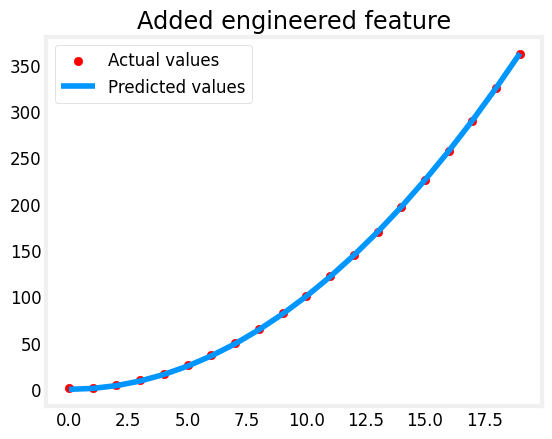

In [14]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2 # unknown
X = x**2 # <-- feature engineering
X = X.reshape(-1, 1)

print(f"x= {x}")
print(f"y= {y}")
print(f"X= {X}")

from lab_utils_multi import run_gradient_descent_feng
model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-5)
f_w_b = np.dot(X, model_w) + model_b

print(f"model_w= {model_w}")
print(f"model_b= {model_b}")
print(f"f_w_b= {f_w_b}")

plt.scatter(x, y, marker='o', c='r', label='Actual values'); plt.title('Added engineered feature')
plt.plot(x, f_w_b, label='Predicted values'); plt.legend()
plt.show()